# Data load and preprocessing
In this notebook we load data, cleanse it, scale and add new features.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# read data from csv, utf-8 encoding
df = pd.read_csv('../data/data_v2.csv', encoding='utf-8')

In [3]:
df.shape

(75443, 9)

In [4]:
df.head()

,Unnamed: 0,amount,amount.1,createdAt,recipient_accountNumber,recipient_full_name,sender_full_name,reviewed,reported
0,0,476.86,425.20,2023-09-14,3b681d83ccee97f33b3e,Stephen Small,Stephen Small,False,False
1,1,700.00,714.80,2023-09-14,22386743d148e118584d,Matthew Gilbert,Matthew Gilbert,False,False
2,2,30.00,31.14,2023-09-14,e2c2800b47b605016ee8,Peter Watkins,Peter Watkins,False,False
3,3,550.00,629.66,2023-09-14,4937ff8c2964230a207d,Cindy Larson,Patricia Brown,False,False
4,4,2285.25,2052.09,2023-09-14,2d3d71ee832ada40ce63,Patricia Ford,Patricia Ford,False,False


In [5]:
df.drop(['Unnamed: 0', 'amount.1'], axis=1, inplace=True)

In [6]:
df.rename(columns={'recipient.fake_accountNumber': 'recipient_accNumber', 'recipient.fake_name': 'recipient_name', 
                   'sender.fake_name': 'sender', 'fake_amount': 'amount'}, inplace=True)

In [7]:
df.head()

,amount,createdAt,recipient_accountNumber,recipient_full_name,sender_full_name,reviewed,reported
0,476.86,2023-09-14,3b681d83ccee97f33b3e,Stephen Small,Stephen Small,False,False
1,700.00,2023-09-14,22386743d148e118584d,Matthew Gilbert,Matthew Gilbert,False,False
2,30.00,2023-09-14,e2c2800b47b605016ee8,Peter Watkins,Peter Watkins,False,False
3,550.00,2023-09-14,4937ff8c2964230a207d,Cindy Larson,Patricia Brown,False,False
4,2285.25,2023-09-14,2d3d71ee832ada40ce63,Patricia Ford,Patricia Ford,False,False


<Axes: >

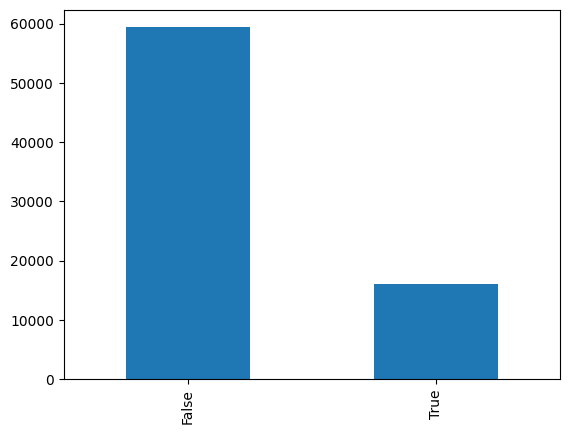

In [8]:
df['reviewed'].value_counts().plot(kind='bar')

<Axes: >

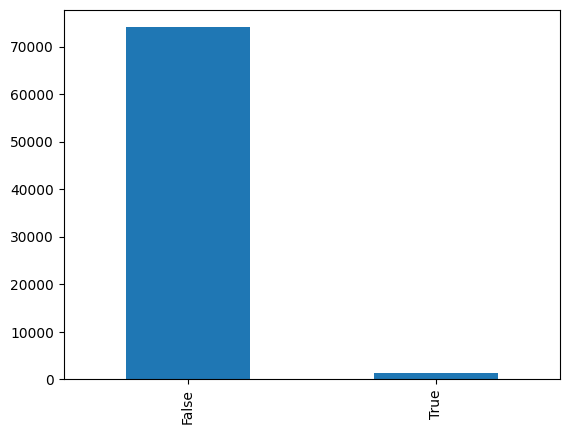

In [9]:
df['reported'].value_counts().plot(kind='bar')

In [10]:
df['reviewed'].value_counts(normalize=True)

False    0.78666
True     0.21334
Name: reviewed, dtype: float64

In [19]:
df['reported'].value_counts(normalize=True)

False    0.981496
True     0.018504
Name: reported, dtype: float64

In [18]:
df.isna().sum()

amount                     0
createdAt                  0
recipient_accountNumber    0
recipient_full_name        0
sender_full_name           0
reviewed                   0
reported                   0
day                        0
month                      0
year                       0
log_amount                 0
scaled_amount              0
is_weekend                 0
day_of_week                0
quarter                    0
dtype: int64

We don't have missing values in our data, so we don't need to impute them. We will use only numerical features, so we don't need to encode categorical features.

In [12]:
# count unique values in each column
n = df.shape[0]
print(n)
print(df['recipient_accountNumber'].nunique())
print(df['recipient_full_name'].nunique())
print(df['sender_full_name'].nunique())

75443
25915
22425
22342


We have 22670 unique senders, 22737 recipients names and 26062 recipient accounts for 76268 withdrawals in our datasets

#### Create data related fields

In [13]:
df['day'] = pd.to_datetime(df['createdAt']).dt.day
df['month'] = pd.to_datetime(df['createdAt']).dt.month
df['year'] = pd.to_datetime(df['createdAt']).dt.year

# Data Preporcessing from the Paper
- Feature dropping is done in the paper, but those features were droped before data was given to us by the company, feautures like unique ids, etc.
- Binary encoding or one hot encoding is not done in the paper, but they are not needed, we only have numerical features
- Null values are imputed in the paper, but we don't have any null values in our data, as our data is already preprocessed before we got it from the company
- Log transformation is done in the paper, we will do it as well to `amount` column
- Scaling is done in the paper, we will do it as well. The research used MinMaxScaler
- New features are created in the paper, we will create those features. (Day of the week, day of month, month, quarter, is weekend)

### Feature Engineering

In [14]:
import numpy as np

df['log_amount'] = df['amount'].apply(lambda x: np.log(x))

In [15]:
df['scaled_amount'] = MinMaxScaler().fit_transform(df['amount'].values.reshape(-1, 1))

In [16]:
df[['scaled_amount', 'log_amount']].describe()

,scaled_amount,log_amount
count,75443.000000,75443.000000
mean,0.000912,6.331190
std,0.012064,1.337783
min,0.000000,0.000000
25%,0.000076,5.438079
50%,0.000166,6.214608
75%,0.000398,7.090077
max,1.000000,14.919135


#### Date related features

In [17]:
# create new fields from createdAt
df['day'] = pd.to_datetime(df['createdAt']).dt.day
df['month'] = pd.to_datetime(df['createdAt']).dt.month
df['year'] = pd.to_datetime(df['createdAt']).dt.year
df['is_weekend'] = pd.to_datetime(df['createdAt']).dt.dayofweek.apply(lambda x: 1 if x > 4 else 0)
df['day_of_week'] = pd.to_datetime(df['createdAt']).dt.dayofweek
df['quarter'] = pd.to_datetime(df['createdAt']).dt.quarter

/var/folders/l0/myv4vn5x1tq6rttc145y03180000gn/T/ipykernel_55903/3258434295.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
/var/folders/l0/myv4vn5x1tq6rttc145y03180000gn/T/ipykernel_55903/3258434295.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_a

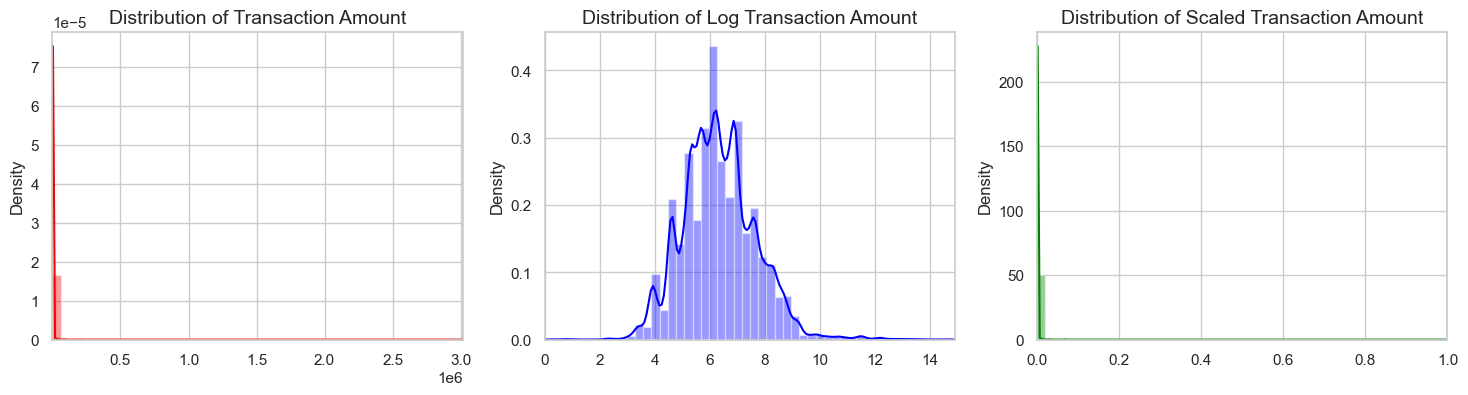

In [98]:
# plot feature distributions
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

amount_val = df['amount'].values
log_amount_val = df['log_amount'].values
scaled_amount_val = df['scaled_amount'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(log_amount_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Log Transaction Amount', fontsize=14)
ax[1].set_xlim([min(log_amount_val), max(log_amount_val)])


sns.distplot(scaled_amount_val, ax=ax[2], color='g')
ax[2].set_title('Distribution of Scaled Transaction Amount', fontsize=14)
ax[2].set_xlim([min(scaled_amount_val), max(scaled_amount_val)])

plt.show()

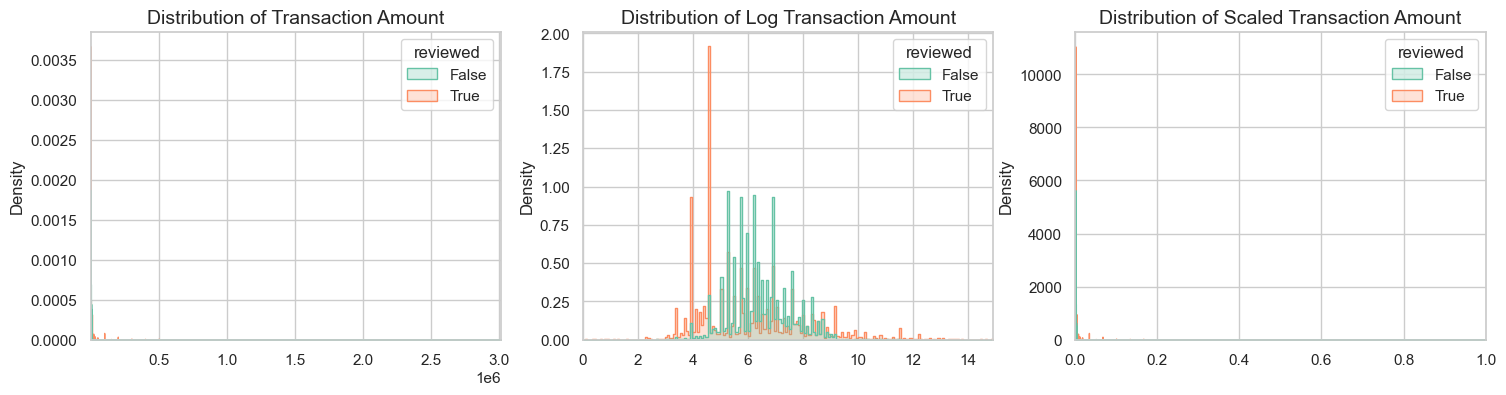

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

amount_val = df['amount'].values
log_amount_val = df['log_amount'].values
scaled_amount_val = df['scaled_amount'].values

# Plot Distribution of Transaction Amount with hue
sns.histplot(data=df, x=amount_val, ax=ax[0], hue=df['reviewed'], element='step', stat="density", common_norm=False)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plot Distribution of Log Transaction Amount with hue
sns.histplot(data=df, x=log_amount_val, ax=ax[1], hue=df['reviewed'], element='step', stat="density", common_norm=False)
ax[1].set_title('Distribution of Log Transaction Amount', fontsize=14)
ax[1].set_xlim([min(log_amount_val), max(log_amount_val)])

# Plot Distribution of Scaled Transaction Amount with hue
sns.histplot(data=df, x=scaled_amount_val, ax=ax[2], hue=df['reviewed'], element='step', stat="density", common_norm=False)
ax[2].set_title('Distribution of Scaled Transaction Amount', fontsize=14)
ax[2].set_xlim([min(scaled_amount_val), max(scaled_amount_val)])

plt.show()


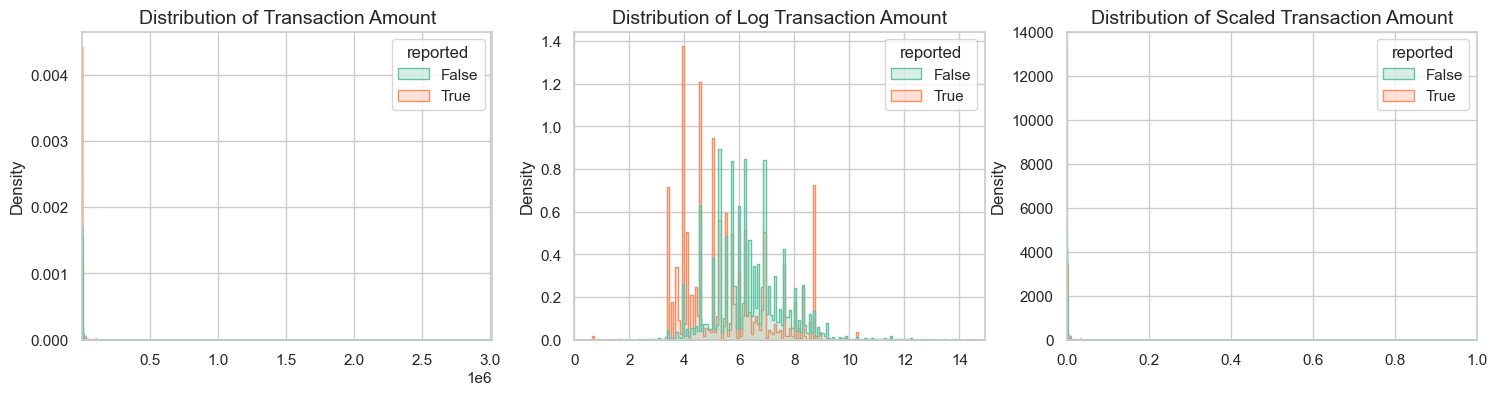

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

amount_val = df['amount'].values
log_amount_val = df['log_amount'].values
scaled_amount_val = df['scaled_amount'].values

# Plot Distribution of Transaction Amount with hue
sns.histplot(data=df, x=amount_val, ax=ax[0], hue=df['reported'], element='step', stat="density", common_norm=False)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# Plot Distribution of Log Transaction Amount with hue
sns.histplot(data=df, x=log_amount_val, ax=ax[1], hue=df['reported'], element='step', stat="density", common_norm=False)
ax[1].set_title('Distribution of Log Transaction Amount', fontsize=14)
ax[1].set_xlim([min(log_amount_val), max(log_amount_val)])

# Plot Distribution of Scaled Transaction Amount with hue
sns.histplot(data=df, x=scaled_amount_val, ax=ax[2], hue=df['reported'], element='step', stat="density", common_norm=False)
ax[2].set_title('Distribution of Scaled Transaction Amount', fontsize=14)
ax[2].set_xlim([min(scaled_amount_val), max(scaled_amount_val)])

plt.show()


In [101]:
df.to_csv('../data/preprocessed_v1.csv', index=False)